<a href="https://colab.research.google.com/github/ojamoo/My-Git-Project/blob/master/StageD_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from skimage import io
from tqdm import tqdm
import cv2
import gc
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_v2.csv to train_v2 (2).csv


In [3]:
import io
train_df=pd.read_csv(io.BytesIO(uploaded['train_v2.csv']))

In [4]:
train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
# Build list with unique labels
label_list = []
for tag_str in train_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
label_list

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [6]:
# Add onehot features for every label
for label in label_list:
    train_df[label] = train_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
train_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


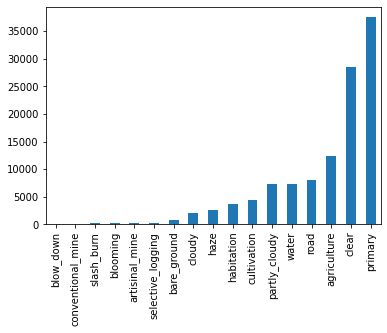

In [7]:
# Histogram of label instances
train_df[label_list].sum().sort_values().plot.bar()

In [8]:
# creating a function that generates a concurrent matrix 
# (a matrix that contains the number of overlaps of pairs of tags)
def make_cooccurence_matrix(labels):
    numeric_df = train_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
#     mask = np.triu(np.ones((len(labels), len(labels))))
    sns.heatmap(c_matrix, cmap=sns.cm.rocket_r)

#     sns.heatmap(c_matrix)
    return c_matrix

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


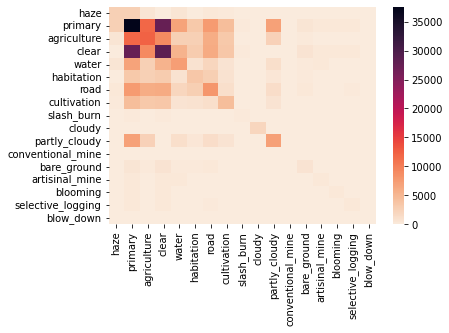

In [9]:
# Compute the co-ocurrence matrix for all labels
make_cooccurence_matrix(label_list)

In [10]:
# classifying the tags into the three categories of : 
# ['atmospheric condition(weather_labels)', 'common land cover(land_labels)' and  'rare land cover(rare_labels)']

weather_labels = ['clear', 'partly_cloudy','cloudy', 'haze']
land_labels = ['primary', 'water', 'habitation', 'agriculture', 'road', 'cultivation', 'bare_ground']
rare_labels = [tag for tag in label_list if (tag not in weather_labels) and (tag not in land_labels)]

,clear,partly_cloudy,cloudy,haze
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
cloudy,0,0,2089,0
haze,0,0,0,2697


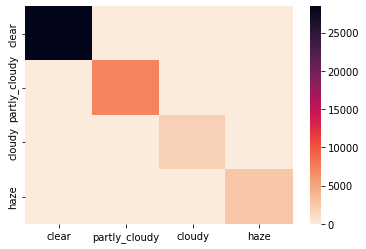

In [11]:
# Compute the co-ocurrence matrix for weather-labels
make_cooccurence_matrix(weather_labels)

,primary,water,habitation,agriculture,road,cultivation,bare_ground
primary,37513,7001,3469,11972,7728,4455,683
water,7001,7411,915,2712,2125,868,206
habitation,3469,915,3660,2737,2786,895,163
agriculture,11972,2712,2737,12315,6034,3377,225
road,7728,2125,2786,6034,8071,1294,323
cultivation,4455,868,895,3377,1294,4477,89
bare_ground,683,206,163,225,323,89,862


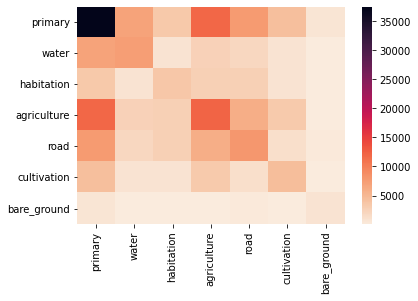

In [12]:
# Compute the co-ocurrence matrix for land-labels
make_cooccurence_matrix(land_labels)

,slash_burn,conventional_mine,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,0,2,2,2
conventional_mine,0,100,4,0,0,0
artisinal_mine,0,4,339,0,6,0
blooming,2,0,0,332,7,1
selective_logging,2,0,6,7,340,1
blow_down,2,0,0,1,1,98


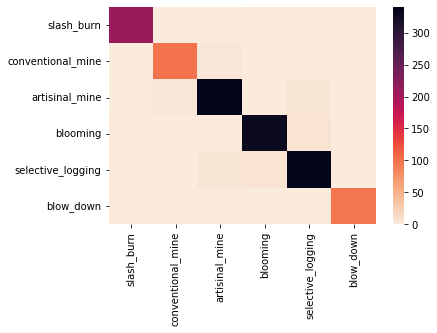

In [13]:
# Compute the co-ocurrence matrix for rare-labels
make_cooccurence_matrix(rare_labels)

In [14]:
# adding '.jpg' extension to 'image_name'
train_df['image_name'] = train_df['image_name'].apply(lambda x: '{}.jpg'.format(x)) 
train_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [15]:
import tarfile
def extract(tar_file, path):
    opened_tar = tarfile.open(tar_file)
     
    if tarfile.is_tarfile(tar_file):
        opened_tar.extractall(path)
    else:
        print("The tar file you entered is not a tar file")

In [16]:
from io import BytesIO

In [17]:
from PIL import Image

In [19]:
image_number=5
uploaded=files.upload()
im=Image.open(BytesIO(uploaded['train_{}.jpg'.format(image_number)]))

Saving train_0.jpg to train_0 (9).jpg
Saving train_1.jpg to train_1 (8).jpg
Saving train_2.jpg to train_2 (7).jpg
Saving train_3.jpg to train_3 (6).jpg
Saving train_4.jpg to train_4 (6).jpg
Saving train_5.jpg to train_5 (5).jpg
Saving train_6.jpg to train_6 (4).jpg
Saving train_7.jpg to train_7 (4).jpg
Saving train_8.jpg to train_8 (4).jpg
Saving train_9.jpg to train_9 (4).jpg
Saving train_10.jpg to train_10 (3).jpg
Saving train_11.jpg to train_11 (3).jpg


In [20]:
pip install Pillow

In [22]:
pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

     |████████████████████████████████| 154 kB 5.2 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


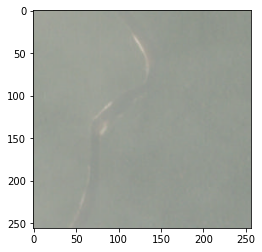

In [23]:
plt.imshow(im)